# Mercedes-Benz Greener Manufacturing

Data Description
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

File descriptions
Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
sample_submission.csv - a sample submission file in the correct format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(df.shape)
df.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum().reset_index().sort_values(0,ascending = False)
#Hence, There is no missing values

,index,0
0,ID,0
248,X254,0
257,X263,0
256,X262,0
255,X261,0
254,X260,0
253,X259,0
252,X258,0
251,X257,0
250,X256,0


In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())

ID
[   0    6    7 ... 8412 8415 8417]
y
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4
['d' 'b' 'c' 'a']
X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10
[0 1]
X11
[0]
X12
[0 1]
X13

In [5]:
#Removing Features that has same value
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_1 = df.drop(cols_to_drop, axis=1)
print(df.shape)
print(df_1.shape)

(4209, 378)
(4209, 366)


#### Hence, there is no missing values & no int to detect for outliers. so, i'm skiping data cleaning/'

# Data Visualization

In [6]:
train = df_1.drop('ID',axis=1)

In [7]:
obj_col = train.select_dtypes(object).columns
num_col = train.select_dtypes(exclude=object).columns
print(obj_col)
print(num_col)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['y', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=357)


In [8]:
train.describe()
#Hence, all values were 0 & 1. There is no outliars

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


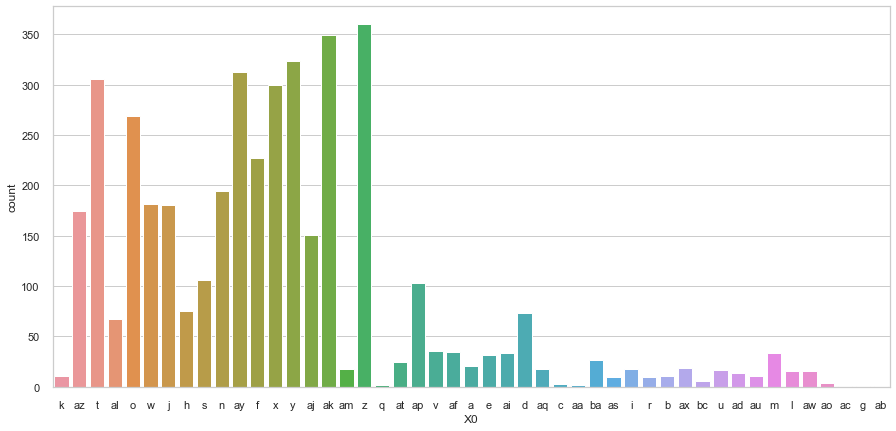

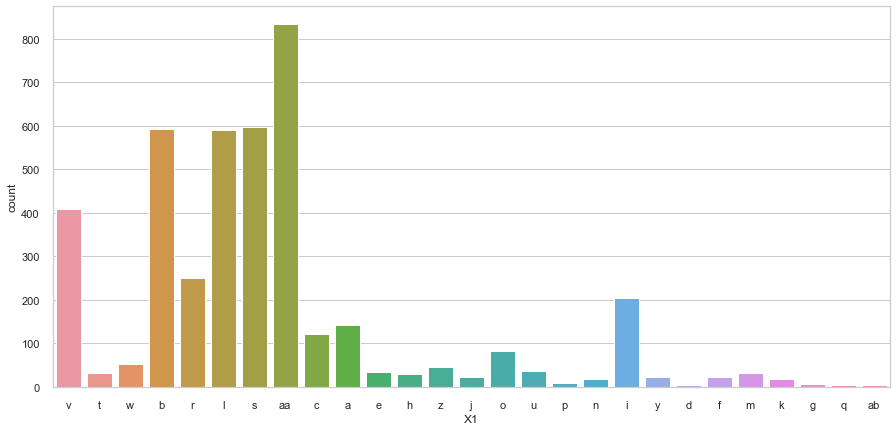

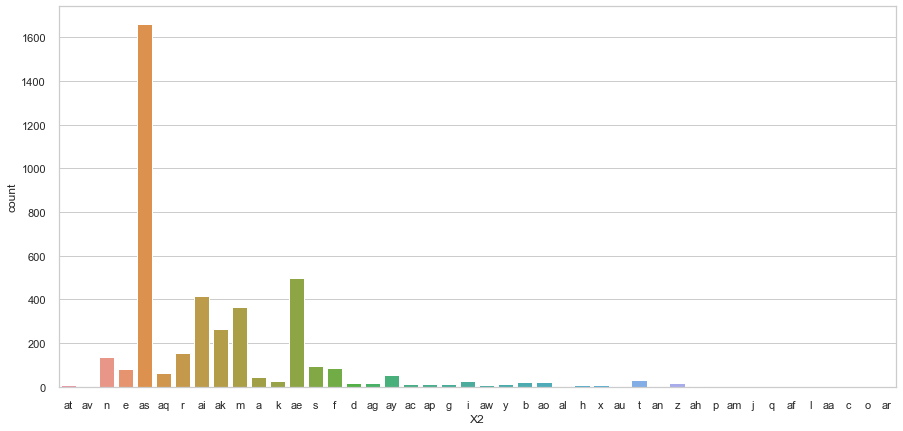

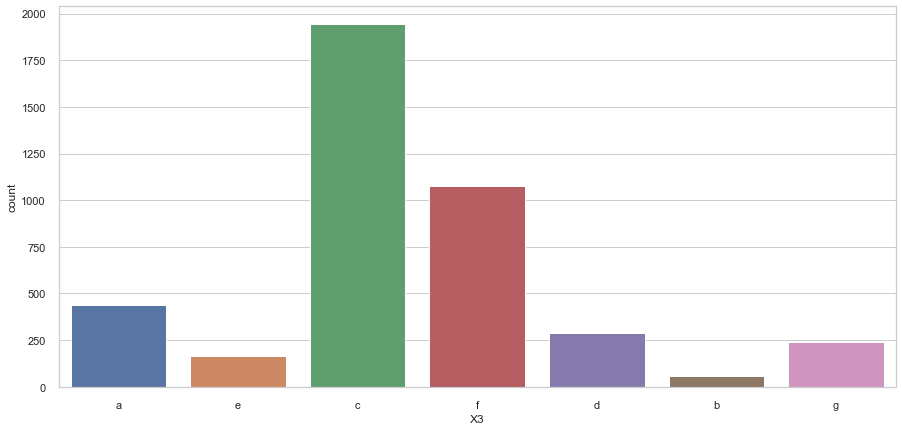

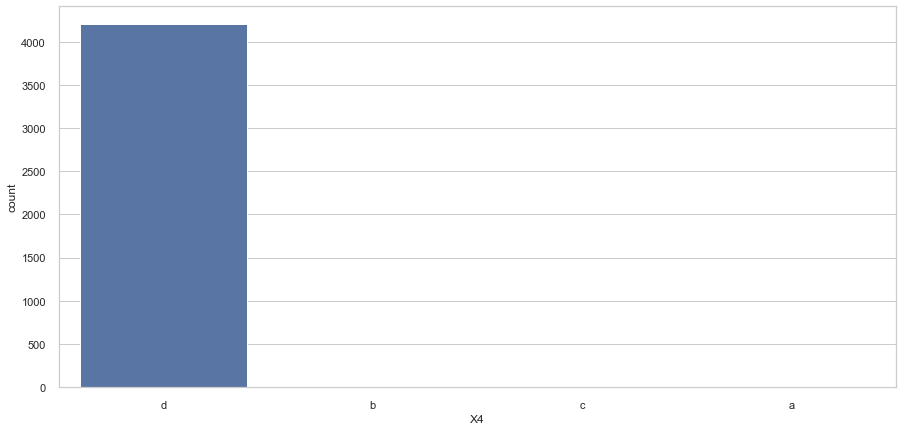

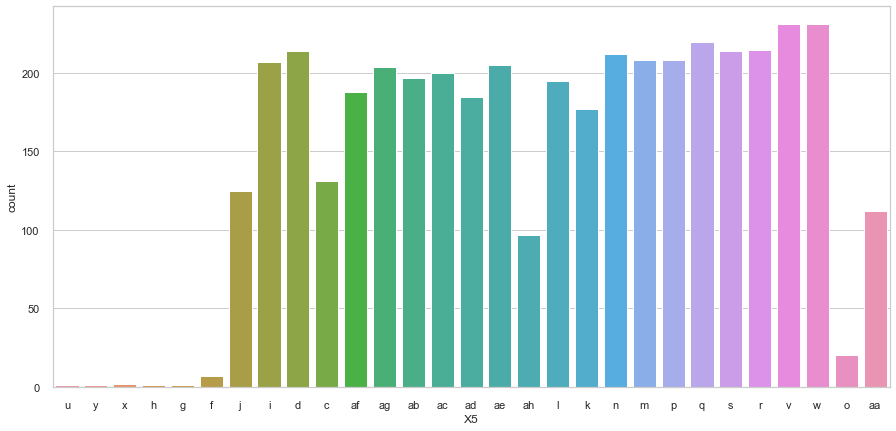

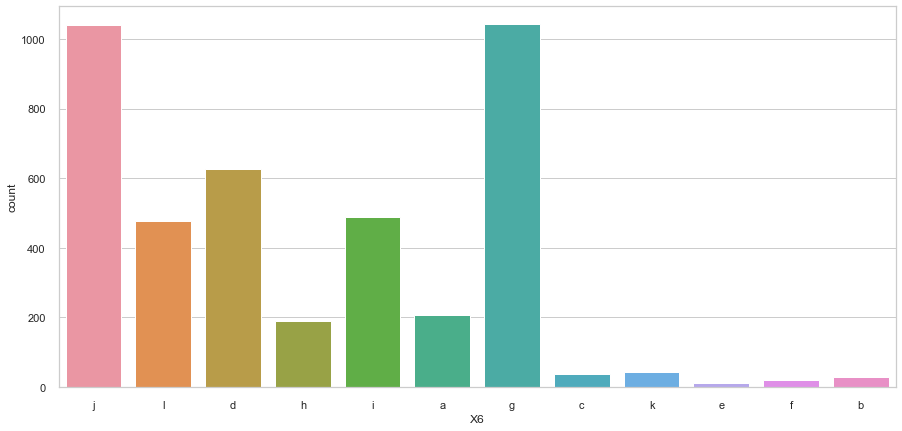

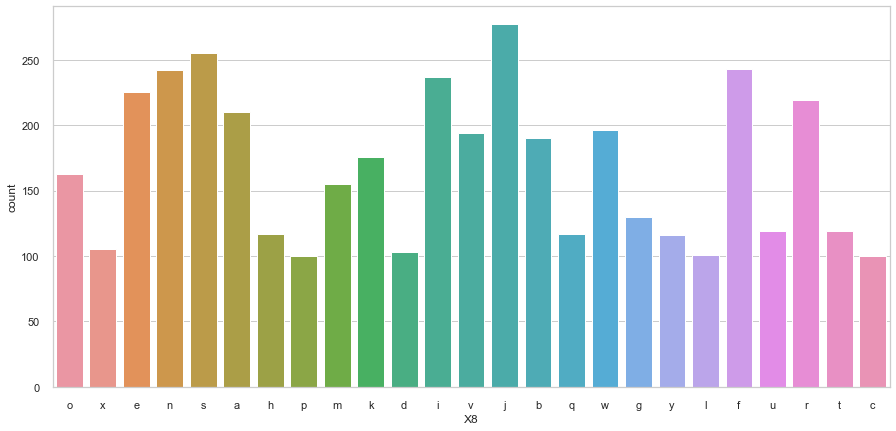

In [9]:
for i in obj_col:
    plt.figure(figsize=[15,7])
    sns.set(style="whitegrid")
    sns.countplot(x = i,data=train)
    plt.show()

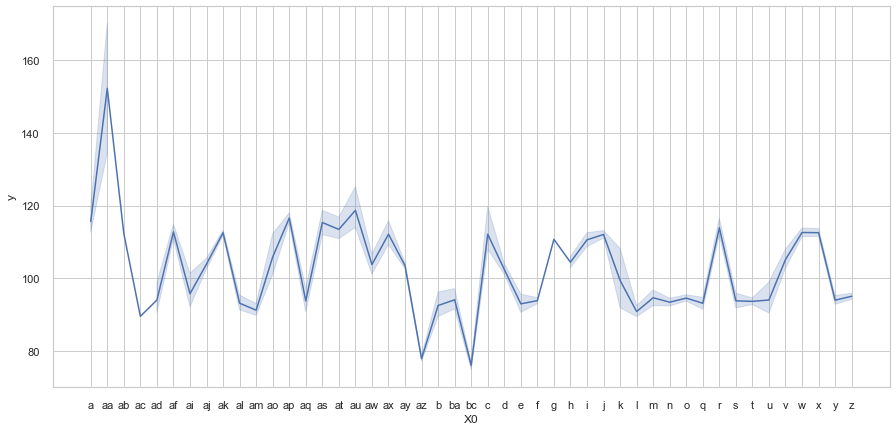

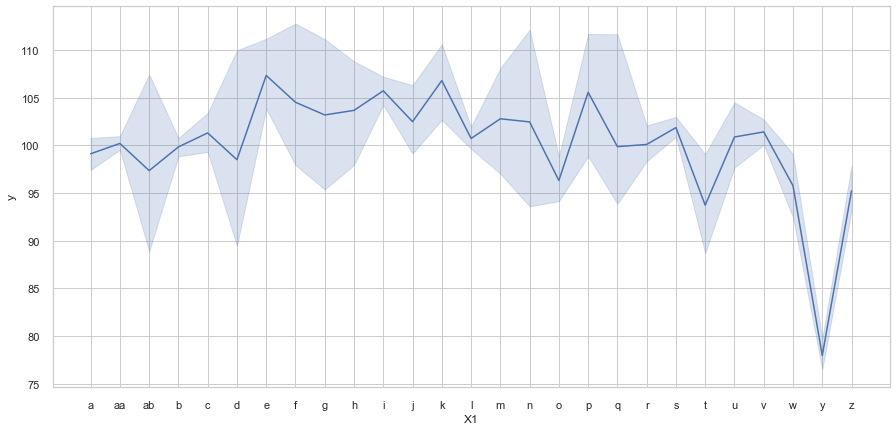

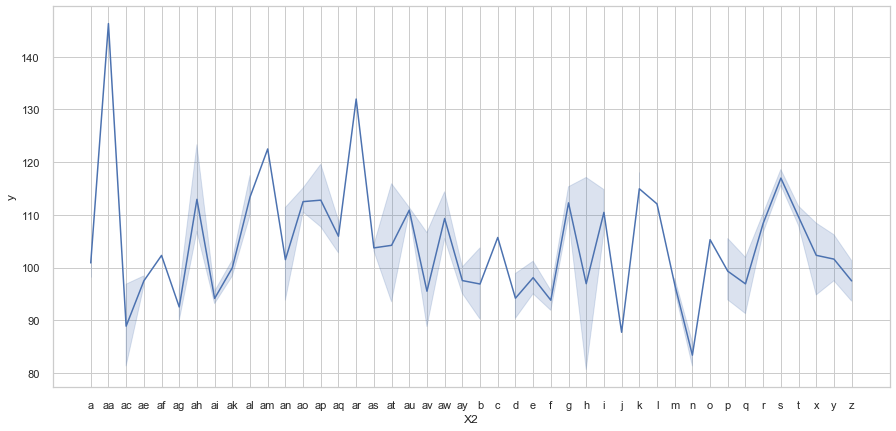

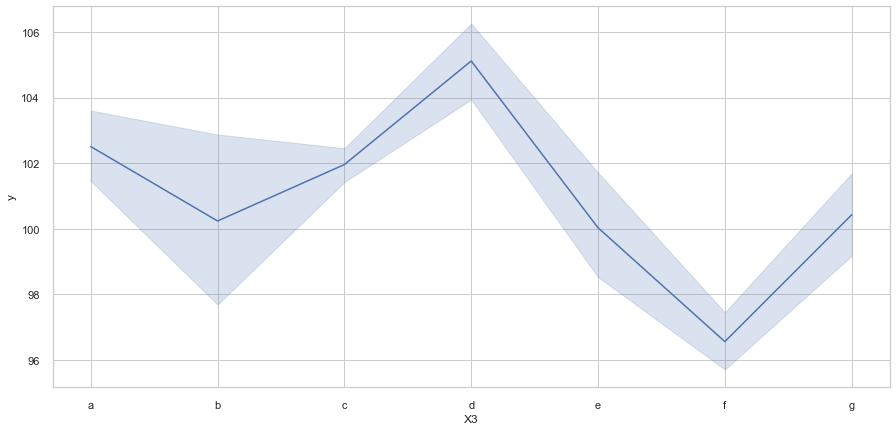

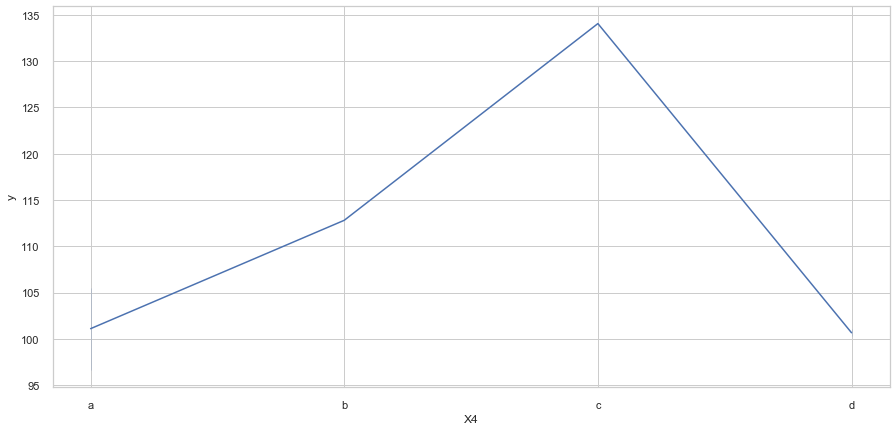

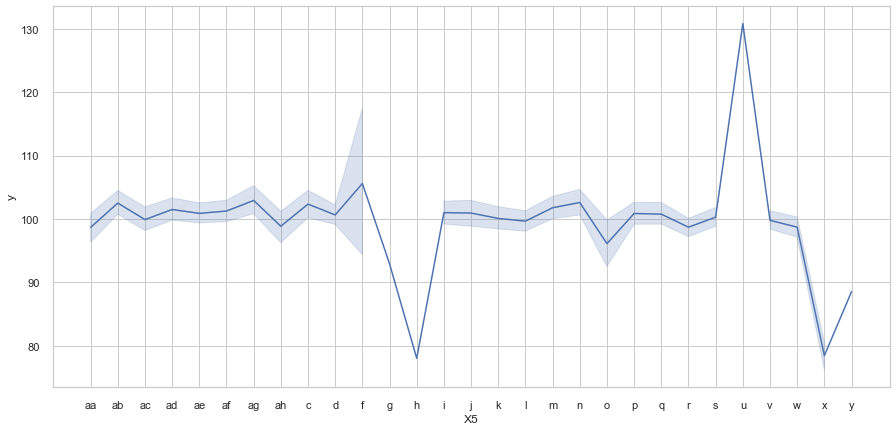

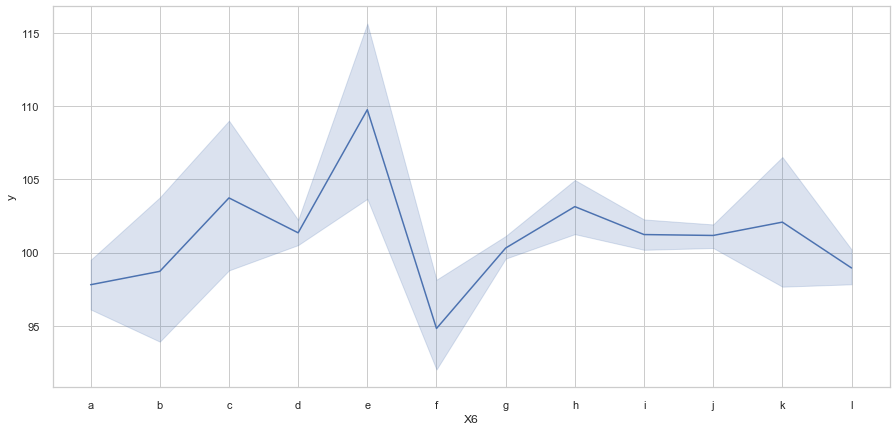

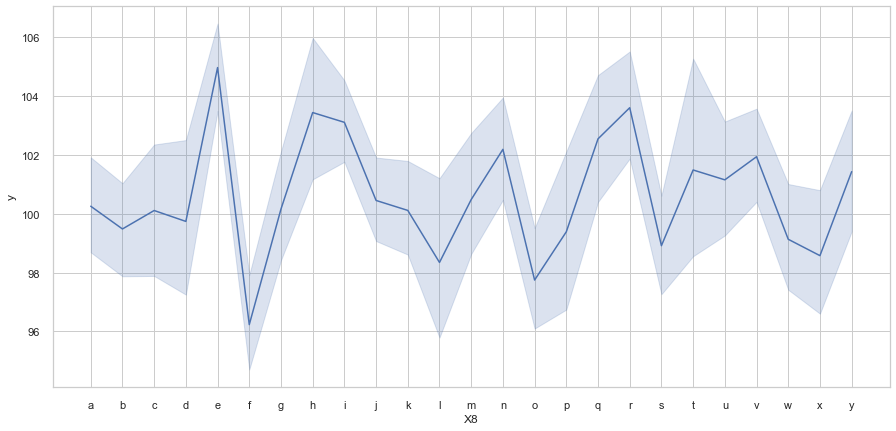

In [10]:
#sns.lineplot(x="X8",y='y',data=train)
for i in obj_col:
    plt.figure(figsize=[15,7])
    sns.set(style="whitegrid")
    sns.lineplot(x = i,y='y',data=train)
    plt.show()

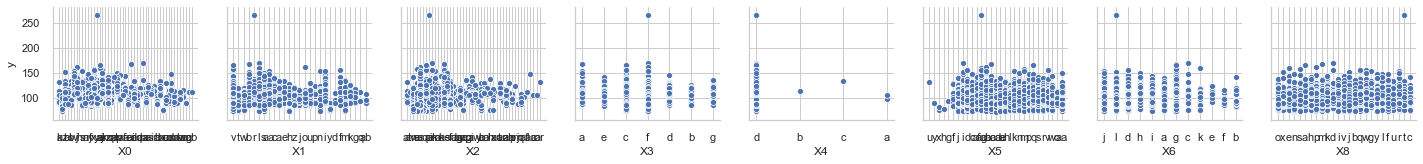

In [11]:
sns.pairplot(data = train,x_vars=obj_col,y_vars="y")


In [12]:
#sns.pairplot(data = train,x_vars=num_col,y_vars="y")

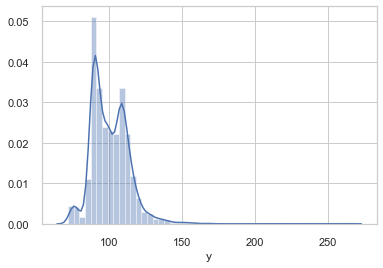

In [13]:
sns.distplot(train['y'])

### From Visualization
 * There is no Linear Relation. 
 * Target variable is completely based on Variables
 
We need to find Best Features 

In [14]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

### Ordinal Encoding

In [68]:
train_o = train.copy()
test_o = test.copy()

In [66]:
a = zip(train_o['X0_r'],train['X0'])
t_X0 = pd.DataFrame(a, columns = ['X0_r', 'X0'])
#t_X0

,X0_r,X0
0,32.0,k
1,32.0,k
2,20.0,az
3,20.0,az
4,20.0,az
5,40.0,t
6,9.0,al
7,36.0,o
8,43.0,w
9,31.0,j


In [69]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

enc.fit(train['X0'].values.reshape(-1, 1),train['y'])
train_o['X0_r'] = enc.transform(train_o['X0'].values.reshape(-1, 1))
a = zip(train_o['X0_r'],train['X0'])
t_X0 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X1'].values.reshape(-1, 1),train['y'])
train_o['X1_r'] = enc.transform(train_o['X1'].values.reshape(-1, 1))
a = zip(train_o['X1_r'],train['X1'])
t_X1 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X2'].values.reshape(-1, 1),train['y'])
train_o['X2_r'] = enc.transform(train_o['X2'].values.reshape(-1, 1))
a = zip(train_o['X2_r'],train['X2'])
t_X2 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X3'].values.reshape(-1, 1),train['y'])
train_o['X3_r'] = enc.transform(train_o['X3'].values.reshape(-1, 1))
a = zip(train_o['X3_r'],train['X3'])
t_X3 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X4'].values.reshape(-1, 1),train['y'])
train_o['X4_r'] = enc.transform(train_o['X4'].values.reshape(-1, 1))
a = zip(train_o['X4_r'],train['X4'])
t_X4 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X5'].values.reshape(-1, 1),train['y'])
train_o['X5_r'] = enc.transform(train_o['X5'].values.reshape(-1, 1))
a = zip(train_o['X5_r'],train['X5'])
t_X5 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X6'].values.reshape(-1, 1),train['y'])
train_o['X6_r'] = enc.transform(train_o['X6'].values.reshape(-1, 1))
a = zip(train_o['X6_r'],train['X6'])
t_X6 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

enc.fit(train['X8'].values.reshape(-1, 1),train['y'])
train_o['X8_r'] = enc.transform(train_o['X8'].values.reshape(-1, 1))
a = zip(train_o['X8_r'],train['X8'])
t_X8 = pd.DataFrame(a, columns = ['X0_r', 'X0'])

train_o = train_o.drop(obj_col,axis=1)
#test_o = test_o.drop(obj_col,axis=1)
enc.categories_

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
       dtype=object)]

In [58]:
test_o = test.copy()
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

enc.fit(test['X0'].values.reshape(-1, 1))
test_o['X0_r'] = enc.transform(test_o['X0'].values.reshape(-1, 1))

enc.fit(test['X1'].values.reshape(-1, 1))
test_o['X1_r'] = enc.transform(test_o['X1'].values.reshape(-1, 1))

enc.fit(test['X2'].values.reshape(-1, 1))
test_o['X2_r'] = enc.transform(test_o['X2'].values.reshape(-1, 1))

enc.fit(test['X3'].values.reshape(-1, 1))
test_o['X3_r'] = enc.transform(test_o['X3'].values.reshape(-1, 1))

enc.fit(test['X4'].values.reshape(-1, 1))
train_o['X4_r'] = enc.transform(test_o['X4'].values.reshape(-1, 1))

enc.fit(test['X5'].values.reshape(-1, 1))
train_o['X5_r'] = enc.transform(test_o['X5'].values.reshape(-1, 1))

enc.fit(test['X6'].values.reshape(-1, 1))
test_o['X6_r'] = enc.transform(train_o['X6'].values.reshape(-1, 1))

enc.fit(train['X8'].values.reshape(-1, 1))
test_o['X8_r'] = enc.transform(test_o['X8'].values.reshape(-1, 1))

test_o = test_o.drop(obj_col,axis=1)
enc.categories_

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
       dtype=object)]

In [17]:
train_o.columns
train_o.shape

(4209, 365)

In [18]:
corr = train_o.corr()

In [19]:
cor = train_o.corr()["y"].reset_index().sort_values(["y"], ascending=False)[:250]
train_o.corr()["y"].reset_index().sort_values(["y"], ascending=False)[:10]

,index,y
0,y,1.000000
288,X314,0.606005
241,X261,0.588785
243,X263,0.379629
121,X136,0.368177
254,X275,0.275042
105,X119,0.272728
104,X118,0.272728
40,X51,0.229999
244,X264,0.228169


In [20]:
col_o = cor['index'].tolist()
train_co = train_o[col_o]
print(col_o)

['y', 'X314', 'X261', 'X263', 'X136', 'X275', 'X119', 'X118', 'X51', 'X264', 'X126', 'X179', 'X130', 'X311', 'X66', 'X198', 'X251', 'X191', 'X222', 'X113', 'X147', 'X48', 'X134', 'X14', 'X315', 'X306', 'X52', 'X224', 'X170', 'X223', 'X187', 'X156', 'X300', 'X68', 'X244', 'X84', 'X71', 'X75', 'X180', 'X354', 'X360', 'X155', 'X228', 'X241', 'X355', 'X150', 'X189', 'X343', 'X238', 'X96', 'X376', 'X47', 'X255', 'X85', 'X363', 'X151', 'X208', 'X331', 'X368', 'X367', 'X171', 'X349', 'X336', 'X221', 'X352', 'X346', 'X267', 'X142', 'X12', 'X236', 'X62', 'X216', 'X172', 'X64', 'X265', 'X197', 'X339', 'X317', 'X69', 'X309', 'X2_r', 'X44', 'X302', 'X219', 'X312', 'X351', 'X131', 'X379', 'X344', 'X109', 'X237', 'X285', 'X163', 'X283', 'X377', 'X34', 'X183', 'X78', 'X214', 'X102', 'X239', 'X53', 'X370', 'X82', 'X176', 'X308', 'X329', 'X211', 'X177', 'X199', 'X112', 'X16', 'X13', 'X202', 'X247', 'X45', 'X282', 'X55', 'X50', 'X116', 'X100', 'X225', 'X305', 'X327', 'X380', 'X383', 'X165', 'X56', 'X342

# Test Train Split

In [27]:
from sklearn.model_selection import train_test_split

X = train_o.drop(["y"],axis=1)
y = train_o[["y"]]
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,test_size=0.4,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2525, 364) (2525, 1)
(1684, 364) (1684, 1)


In [28]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.4547818962748269

# Feature Selection
### RFE

In [29]:
from sklearn.feature_selection import RFE
rfe = RFE(randf, n_features_to_select=50)

In [30]:
rfe = rfe.fit(X_train, y_train)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#print(rfe.support_)
rank = rfe.ranking_
print(rfe.ranking_)           

[166   4  38  29 217 208 206 184 106  16 218  47  94 194 141   1 173 162
 221  53 175 281 171  17 176  66  75 246 231 119 254  51 249  95   1   1
 240  55   8   1 137 250 245 177  61 168   1 282 289  93 255 190   1  32
 213 214  65  28   1   1   7 291 107 205   1 264 103 178   1 136 117  90
  15  59 227 271 306 229 130 305 286  22  68 201 144 299   1 147 290   1
 203 266 140 154  14 253 211 247 280  25  12   1  60   1   1 135 192 197
 300 257 195 215 169  99 274 128   1  49 236 104   1  40 145  13 105  70
   6  78  64 235 151 312 131   1   1   1 284   1 118   1  31   1 199 294
  97 310   1  52 152 191 278   1 204 159  24 248  43  72  85  77  57  54
 113  19   2  41 308 293 158 133  89 120 302  18 222 101 116 112 110 295
 313 296   1  96 139 311 301  91 263  84  30 285 121 228 261 198 143 262
 179   1 134   1 196 200  37  11   1  48 259 123  45  88 149 273 150 272
 234 202 219  20  35 230 193  71 242  33 126 216 226 102 100 252 260 157
 188  82 233 303 269 241 183 279 237 187 156 292  2

In [32]:
sel_fea = X_train.columns[rfe.ranking_<25]
sel_fea.size

73

In [33]:
a = zip(X_train,rank)
rfe_col = pd.DataFrame(a, columns = ['Col', 'Rank']).sort_values("Rank")
top_col = list(rfe_col["Col"])

#print(top_col)
rfe_col[:10]

,Col,Rank
363,X8_r,1
68,X81,1
35,X47,1
287,X314,1
288,X315,1
39,X51,1
201,X220,1
295,X322,1
199,X218,1
104,X119,1


In [ ]:
#logreg2 = LogisticRegression()
#model2 = logreg2.fit(X_train[sel_fea], y_train)
#model2.coef_
#model2.intercept_

# VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train[sel_fea].columns
vif['VIF'] = [variance_inflation_factor(X_train[sel_fea].values, i) for i in range(X_train[sel_fea].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[:5]

C:\Users\Anand\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
55,X324,inf
8,X58,inf
23,X119,inf
22,X118,inf
27,X142,136.58


In [36]:
vif_col = vif[:180]
col = list(vif_col["Features"])
print(col)

['X324', 'X58', 'X119', 'X118', 'X142', 'X311', 'X171', 'X168', 'X158', 'X136', 'X374', 'X154', 'X115', 'X85', 'X355', 'X150', 'X103', 'X132', 'X201', 'X224', 'X191', 'X283', 'X375', 'X47', 'X20', 'X267', 'X294', 'X100', 'X116', 'X300', 'X2_r', 'X180', 'X327', 'X218', 'X1_r', 'X163', 'X81', 'X139', 'X350', 'X181', 'X27', 'X12', 'X35', 'X3_r', 'X50', 'X345', 'X64', 'X220', 'X273', 'X351', 'X0_r', 'X46', 'X156', 'X314', 'X354', 'X51', 'X71', 'X70', 'X340', 'X315', 'X225', 'X342', 'X152', 'X151', 'X109', 'X322', 'X240', 'X6_r', 'X73', 'X8_r', 'X77', 'X5_r', 'X95']


In [37]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = sm.add_constant(X_train[col])
y = y_train

C:\Users\Anand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     53.13
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:37:05   Log-Likelihood:                -8757.2
No. Observations:                2525   AIC:                         1.766e+04
Df Residuals:                    2454   BIC:                         1.807e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4189      1.361     36.308      0.0

In [39]:
#results.pvalues['job_entrepreneur ']
col_pval = []

for i in col:
    a = round(results.pvalues[i],3)
    col_pval.append(a)
    
col_pval
a = zip(col,col_pval)
df_pval = pd.DataFrame(a, columns = ['Col', 'pval']).sort_values("pval")
#df_pval

In [40]:
sel_fea_pv = list(df_pval[df_pval['pval'].between(0,.05,inclusive= True)].Col)
sel_fea_pv

['X315',
 'X119',
 'X118',
 'X142',
 'X311',
 'X314',
 'X0_r',
 'X158',
 'X324',
 'X95',
 'X58',
 'X240',
 'X5_r',
 'X156',
 'X345',
 'X154',
 'X163',
 'X47',
 'X136',
 'X139',
 'X103',
 'X342',
 'X71']

In [41]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea], y_train)
pred = randf.predict(X_test[sel_fea])
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4527959351710119

In [42]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea_pv], y_train)
pred = randf.predict(X_test[sel_fea_pv])
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4409446653598881

# With given test model

In [ ]:
X_train = train_o.drop('y',axis=1)
y_train = train_o['y']
X_test = 

In [50]:
train_o = train.copy()

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

enc.fit(train['X0'].values.reshape(-1, 1),train['y'])
train_o['X0_r'] = enc.transform(train_o['X0'].values.reshape(-1, 1))
test_o['X0_r'] = enc.transform(test_o['X0'].values.reshape(-1, 1))



ValueError: Found unknown categories ['an', 'ae', 'p', 'ag', 'av', 'bb'] in column 0 during transform

In [57]:
test_o['X0'].unique()

array(['az', 't', 'w', 'y', 'x', 'f', 'ap', 'o', 'ay', 'al', 'h', 'z',
       'aj', 'd', 'v', 'ak', 'ba', 'n', 'j', 's', 'af', 'ax', 'at', 'aq',
       'av', 'm', 'k', 'a', 'e', 'ai', 'i', 'ag', 'b', 'am', 'aw', 'as',
       'r', 'ao', 'u', 'l', 'c', 'ad', 'au', 'bc', 'g', 'an', 'ae', 'p',
       'bb'], dtype=object)

In [53]:
train_o['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

profile = ProfileReport(df, title='Pandas Profiling Report')

profile